In [62]:
#LIMITE = 2
%%file 0503.al
1 4
2 3
-
-
5 6
7 8
-
-
-

Overwriting 0503.al


In [63]:
with open("0503.al") as f:
  G = []
  for line in f:
    if line == "-\n":
      G.append([])
    else:
      G.append([int(x) for x in line.split()])

for x in G:
  print(x)

[1, 4]
[2, 3]
[]
[]
[5, 6]
[7, 8]
[]
[]
[]


In [64]:
import graphviz as gv
Vertices = ["0", "1", "2", "3", "4", "5", "6", "7", "8"]
Grafico = gv.Digraph("DLS")
n = len(G)
print(n)

9


In [65]:
def CrearNodos():
  for i in range(n):
    Grafico.node(str(i), Vertices[i])

def CrearAristas():
  for i in range(n):
    for j in G[i]:
      Grafico.edge(str(i), str(j))

CrearNodos()
CrearAristas()

print(Grafico)

digraph DLS {
	0 [label=0]
	1 [label=1]
	2 [label=2]
	3 [label=3]
	4 [label=4]
	5 [label=5]
	6 [label=6]
	7 [label=7]
	8 [label=8]
	0 -> 1
	0 -> 4
	1 -> 2
	1 -> 3
	4 -> 5
	4 -> 6
	5 -> 7
	5 -> 8
}


In [66]:
def drawG_al(G, directed=False, weighted=False, path=[], layout="sfdp"):
  graph = gv.Digraph("di-anyname") if directed else gv.Graph("anyname")
  graph.graph_attr["layout"] = layout
  graph.edge_attr["color"] = "gray"
  graph.node_attr["color"] = "orangered"
  graph.node_attr["width"] = "0.1"
  graph.node_attr["height"] = "0.1"
  graph.node_attr["fontsize"] = "8"
  graph.node_attr["fontcolor"] = "mediumslateblue"
  graph.node_attr["fontname"] = "monospace"
  graph.edge_attr["fontsize"] = "8"
  graph.edge_attr["fontname"] = "monospace"
  n = len(G)
  added = set()
  for v, u in enumerate(path):
    if u != -1:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        graph.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        graph.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  for u in range(n):
    for edge in G[u]:
      if weighted:
        v, w = edge
      else:
        v = edge
      draw = False
      if not directed and not f"{u},{v}" in added:
        added.add(f"{u},{v}")
        added.add(f"{v},{u}")
        draw = True
      elif directed and not f"{u},{v}" in added:
        added.add(f"{u},{v}")
        draw = True
      if draw:
        if weighted:
          graph.edge(str(u), str(v), str(w))
        else:
          graph.edge(str(u), str(v))
  return graph

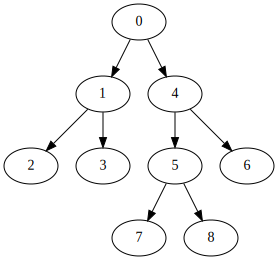

In [67]:
gv.Source(Grafico)

In [68]:

def dls(G, s, L):
  n = len(G)
  visited = [False]*n
  path = [-1]*n

  def _dls(u, L):
    if L > 0 and not visited[u]:
      visited[u] = True
      for v in G[u]:
        if not visited[v]:
          path[v] = u
          _dls(v, L - 1)

  _dls(s, L)
  return path

    


[-1, 0, -1, -1, 0, -1, -1, -1, -1]


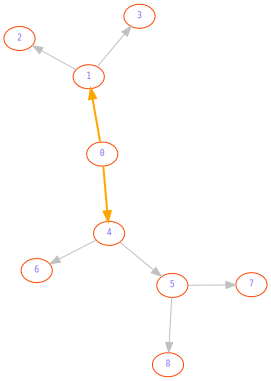

In [69]:
#EJEMPLO 1
#dfs(visited,G)
#print(visited)
camino=dls(G, 0, 1)
print(camino)

drawG_al(G, directed=True, path=camino, layout="neato")